In [1]:
## Import necessary packages
import pandas as pd
import numpy as np
import folium
from folium import plugins
from folium.plugins import MarkerCluster
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Set pandas's max row display
pd.set_option('display.max_row', 1000)

# Set pandas's max column width to 50
pd.set_option('display.max_columns', 50)

In [2]:
# Load in the Chicago crime dataset
df = pd.read_csv('crime_data.csv')

In [3]:
## Print first 5 lines of dataset
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10853390,JA157081,02/17/2017 12:20:00 PM,039XX W CHICAGO AVE,031A,ROBBERY,ARMED: HANDGUN,CONVENIENCE STORE,False,False,1112,11.0,37.0,23.0,03,1150018.0,1905056.0,2017,02/06/2020 03:54:12 PM,41.895384,-87.724470,"(41.895383921, -87.724469836)"
1,11972128,JD139947,03/17/2017 04:00:00 PM,053XX W BELMONT AVE,0890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,2514,25.0,30.0,19.0,06,NaN,NaN,2017,02/05/2020 03:55:05 PM,NaN,NaN,NaN
2,11971880,JD140173,09/01/2017 12:01:00 AM,059XX W ADDISON ST,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,1633,16.0,36.0,15.0,02,NaN,NaN,2017,02/05/2020 03:55:05 PM,NaN,NaN,NaN
3,11118466,JA470941,10/14/2017 07:20:00 AM,086XX S HALSTED ST,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,STREET,True,False,622,6.0,21.0,71.0,02,1172479.0,1847789.0,2017,02/05/2020 03:52:05 PM,41.737771,-87.643664,"(41.737770715, -87.643664418)"
4,11970359,JD138322,04/11/2017 09:00:00 AM,002XX N WALLER AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,1512,15.0,29.0,25.0,06,NaN,NaN,2017,02/04/2020 03:58:33 PM,NaN,NaN,NaN


In [4]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [5]:
## Check if any rows are missing data and are null
df['Primary Type'].isnull().values.any()

False

In [6]:
## Count number of observations for each crime
df['Primary Type'].value_counts()

THEFT                                191854
BATTERY                              148480
CRIMINAL DAMAGE                       83508
ASSAULT                               60296
DECEPTIVE PRACTICE                    56552
OTHER OFFENSE                         51073
NARCOTICS                             39154
BURGLARY                              34351
MOTOR VEHICLE THEFT                   30337
ROBBERY                               29544
CRIMINAL TRESPASS                     20537
WEAPONS VIOLATION                     16462
OFFENSE INVOLVING CHILDREN             6866
CRIM SEXUAL ASSAULT                    4875
PUBLIC PEACE VIOLATION                 4387
INTERFERENCE WITH PUBLIC OFFICER       3939
SEX OFFENSE                            3435
PROSTITUTION                           2133
HOMICIDE                               1777
ARSON                                  1191
LIQUOR LAW VIOLATION                    689
STALKING                                619
KIDNAPPING                      

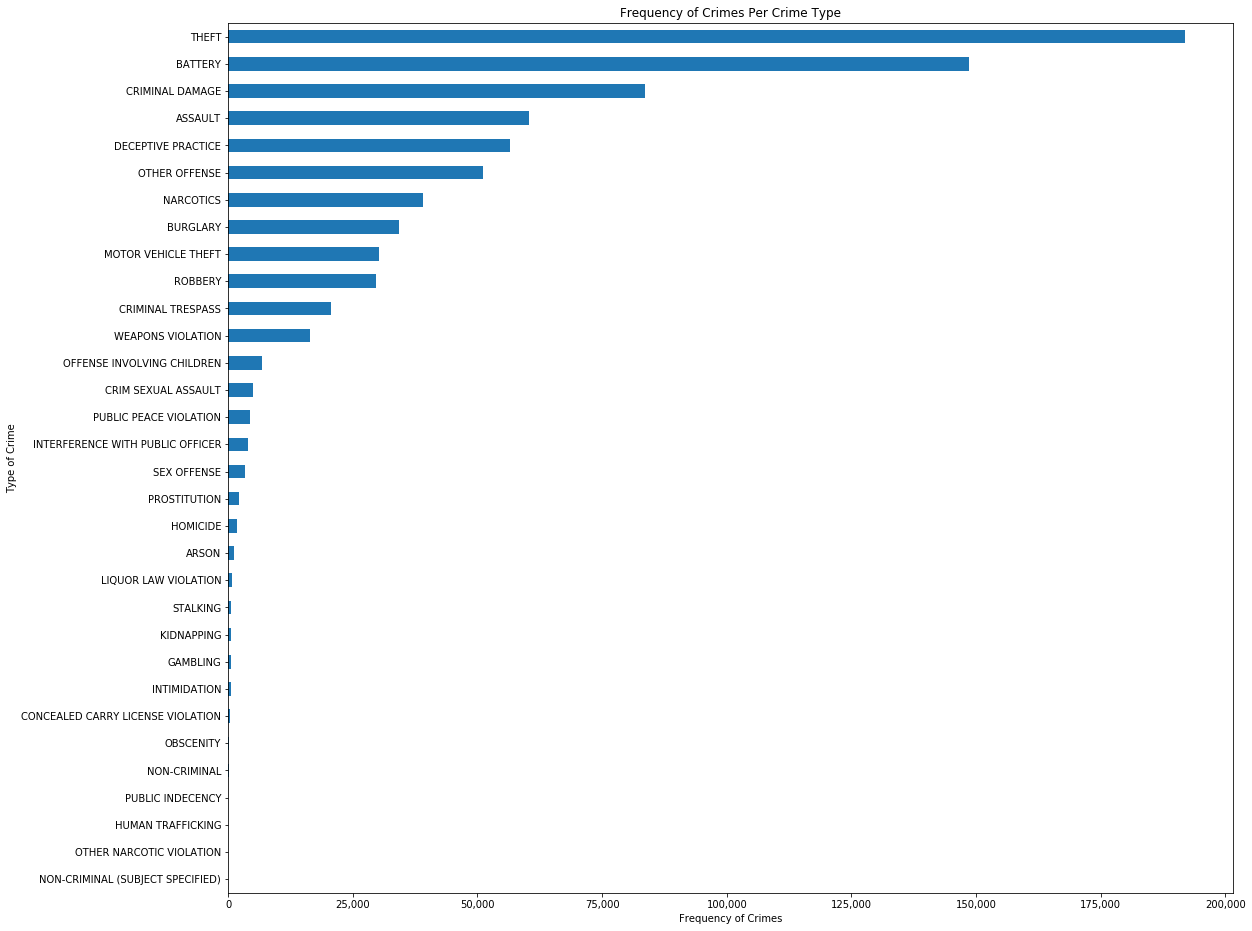

In [7]:
## Plot these for better visualization
crime_type_df = df['Primary Type'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(18, 16))
plt.title("Frequency of Crimes Per Crime Type")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Type of Crime")
ax = crime_type_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In [8]:
## Count number of reported crimes for each year
df['Year'].value_counts()

2017    268491
2018    267822
2019    258133
Name: Year, dtype: int64

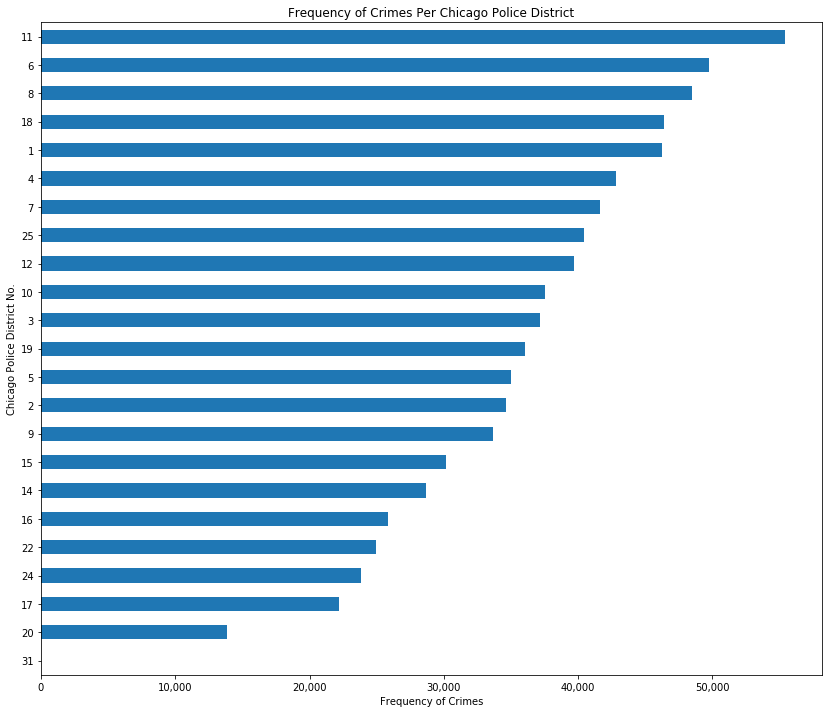

In [9]:
# calculating total number of incidents per district
district_crime = df['District'].value_counts(ascending=True)

## Data cleaning
district_crime.index = district_crime.index.astype(int)
district_crime.index = district_crime.index.astype(str)

## Plot bar graph for initial visualization
fig=plt.figure(figsize=(14, 12))
plt.title("Frequency of Crimes Per Chicago Police District")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Chicago Police District No.")
ax = district_crime.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In [10]:
## Reset index and name the district and crime count columns
district_crime = district_crime.reset_index()
district_crime.columns = ['District', 'Count']

In [11]:
cleaned_df = df[df['Latitude'].notnull() & df['Longitude'].notnull()].copy()

In [12]:
# creation of the choropleth
geo_path = 'C:/Users/aayus/Desktop/Boundaries - Police Districts (current).geojson'
district_map = folium.Map(location=[cleaned_df['Latitude'].mean(), cleaned_df['Longitude'].mean()], zoom_start=10)
threshold_scale = list(np.linspace(0,72000,6))
district_map.choropleth(geo_data=geo_path,
              name='choropleth',
              data = district_crime,
              threshold_scale=threshold_scale,
              columns = ['District', 'Count'],
              key_on = 'feature.properties.dist_num',
              fill_color = 'YlOrRd',
              fill_opacity = 0.7,
              line_opacity = 0.2,
              legend_name = 'Frequency of crimes per district',
              highlight=True)


district_map.save("Crime-per-district-choropleth.html")
district_map

C:\Users\aayus\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
